# Titanic 데이터는 타이타닉호의 탑승자들의 생존에 관련한 데이터이다. 데이터에 대한 설명은 아래와 같다.
|변수|설명|
|:--|:--|
|pclass|1,2,3등석 정보를 각각 1,2,3으로 저장|
|survived|생존 여부(0 : 사망, 1: 생존|
|name|이름|
|sex|성별|
|age|나이|
|sibsp|함께 탑승한 형제 또는 배우자의 수|
|parch|함께 탑승한 형제 또는 자녀의 수|
|ticket|티켓번호|
|fare|티켓요금|
|cabin|선실번호|
|embarked|탑승한 곳(C, Q, S)|

## 1. cabin, embarked변수의 값 중 ""로 처리된 값을 NA로 바꾸고 아래의 데이터 테이블을 보고 문자형, 범주형 변수들을 각각 character, factor형으로 변환하시오. 또, 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최빈값으로 대체하고 age변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가하시오
|범주|범위|
|:--:|:--:|
|0|0이상 10미만|
|1|10이상 20미만|
|2|20이상 30미만|
|3|30이상 40미만|
|4|40이상 50미만|
|5|50이상 60미만|
|6|60이상 70미만|
|7|70이상 80미만|
|8|80이상 90미만|

In [1]:
# 모듈 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 불러오기
titanic = pd.read_csv('./Data/data_edu/모의고사 2회/titanic.csv')

In [3]:
# 데이터 정보 확인하기
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


### 수치형 변수와 범주형 변수 분리

In [4]:
# 수치형 변수와 범주형 변수 분리
cols = titanic.columns
cols_obj = list()
cols_num = list()
for idx, val in enumerate(titanic.dtypes):
    if val == 'object':
        cols_obj.append(cols[idx])
    else:
        cols_num.append(cols[idx])

In [5]:
# 수치형 데이터 프레임과 범주형 데이터 프레임으로 분리
titanic_obj = titanic[cols_obj]
titanic_num = titanic[cols_num]

In [6]:
# 데이터 확인 - 수치형
titanic_num

,pclass,survived,age,sibsp,parch,fare
0,1,1,29.00,0,0,211.3375
1,1,1,0.92,1,2,151.5500
2,1,0,2.00,1,2,151.5500
3,1,0,30.00,1,2,151.5500
4,1,0,25.00,1,2,151.5500
...,...,...,...,...,...,...
1304,3,0,14.50,1,0,14.4542
1305,3,0,NaN,1,0,14.4542
1306,3,0,26.50,0,0,7.2250
1307,3,0,27.00,0,0,7.2250


In [7]:
# 데이터 확인 - 범주형
titanic_obj

,name,sex,ticket,cabin,embarked
0,"Allen, Miss. Elisabeth Walton",female,24160,B5,S
1,"Allison, Master. Hudson Trevor",male,113781,C22 C26,S
2,"Allison, Miss. Helen Loraine",female,113781,C22 C26,S
3,"Allison, Mr. Hudson Joshua Creighton",male,113781,C22 C26,S
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S
...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",female,2665,NaN,C
1305,"Zabour, Miss. Thamine",female,2665,NaN,C
1306,"Zakarian, Mr. Mapriededer",male,2656,NaN,C
1307,"Zakarian, Mr. Ortin",male,2670,NaN,C


### 범주형 변수의 결측치 -> 최빈값으로 대체

In [8]:
# 범주형 데이터 프레임 정보 재확인
titanic_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      1309 non-null   object
 1   sex       1309 non-null   object
 2   ticket    1309 non-null   object
 3   cabin     295 non-null    object
 4   embarked  1307 non-null   object
dtypes: object(5)
memory usage: 51.3+ KB


In [9]:
# 범주형 변수의 결측치 -> 최빈값으로 대체
cols_obj = titanic_obj.columns
for val in cols_obj:
    mode = titanic_obj[val].mode().to_list()[0]
    titanic_obj[val] = titanic_obj[val].fillna(mode)

<ipython-input-9-7a982a1e2be8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_obj[val] = titanic_obj[val].fillna(mode)


In [10]:
# 데이터 확인 
titanic_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      1309 non-null   object
 1   sex       1309 non-null   object
 2   ticket    1309 non-null   object
 3   cabin     1309 non-null   object
 4   embarked  1309 non-null   object
dtypes: object(5)
memory usage: 51.3+ KB


### 수치형 변수의 결측치 -> 중앙값으로 대체

In [11]:
# 수치형 데이터 프레임 정보 재확인
titanic_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   age       1046 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   fare      1308 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 61.5 KB


In [12]:
# 수치형 변수의 결측치 -> 중앙값으로 대체
cols_num = titanic_num.columns
for val in cols_num:
    median = titanic_num[val].median()
    titanic_num[val] = titanic_num[val].fillna(median)

<ipython-input-12-e4c904f5be57>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_num[val] = titanic_num[val].fillna(median)


In [13]:
# 데이터 확인
titanic_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   fare      1309 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 61.5 KB


### age 변수 구간화

In [14]:
# 수치형 데이터 프레임 확인하기
titanic_num

,pclass,survived,age,sibsp,parch,fare
0,1,1,29.00,0,0,211.3375
1,1,1,0.92,1,2,151.5500
2,1,0,2.00,1,2,151.5500
3,1,0,30.00,1,2,151.5500
4,1,0,25.00,1,2,151.5500
...,...,...,...,...,...,...
1304,3,0,14.50,1,0,14.4542
1305,3,0,28.00,1,0,14.4542
1306,3,0,26.50,0,0,7.2250
1307,3,0,27.00,0,0,7.2250


In [15]:
# age 변수 구간화
titanic_num['age_1'] = pd.cut(titanic_num['age'], [10*x for x in range(10)], labels = [x for x in range(9)])

<ipython-input-15-b1b5fdca1c24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_num['age_1'] = pd.cut(titanic_num['age'], [10*x for x in range(10)], labels = [x for x in range(9)])


In [16]:
# 데이터 확인
titanic_num

,pclass,survived,age,sibsp,parch,fare,age_1
0,1,1,29.00,0,0,211.3375,2
1,1,1,0.92,1,2,151.5500,0
2,1,0,2.00,1,2,151.5500,0
3,1,0,30.00,1,2,151.5500,2
4,1,0,25.00,1,2,151.5500,2
...,...,...,...,...,...,...,...
1304,3,0,14.50,1,0,14.4542,1
1305,3,0,28.00,1,0,14.4542,2
1306,3,0,26.50,0,0,7.2250,2
1307,3,0,27.00,0,0,7.2250,2


### 전처리 완료된 데이터 프레임 만들기

In [17]:
titanic_processed = pd.concat([titanic_num, titanic_obj], axis = 1)

In [18]:
# 데이터 확인
titanic_processed

,pclass,survived,age,sibsp,parch,fare,age_1,name,sex,ticket,cabin,embarked
0,1,1,29.00,0,0,211.3375,2,"Allen, Miss. Elisabeth Walton",female,24160,B5,S
1,1,1,0.92,1,2,151.5500,0,"Allison, Master. Hudson Trevor",male,113781,C22 C26,S
2,1,0,2.00,1,2,151.5500,0,"Allison, Miss. Helen Loraine",female,113781,C22 C26,S
3,1,0,30.00,1,2,151.5500,2,"Allison, Mr. Hudson Joshua Creighton",male,113781,C22 C26,S
4,1,0,25.00,1,2,151.5500,2,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,14.50,1,0,14.4542,1,"Zabour, Miss. Hileni",female,2665,C23 C25 C27,C
1305,3,0,28.00,1,0,14.4542,2,"Zabour, Miss. Thamine",female,2665,C23 C25 C27,C
1306,3,0,26.50,0,0,7.2250,2,"Zakarian, Mr. Mapriededer",male,2656,C23 C25 C27,C
1307,3,0,27.00,0,0,7.2250,2,"Zakarian, Mr. Ortin",male,2670,C23 C25 C27,C


## 2) 전처리가 완료된 titanic 데이터를 train(70%), test(30%) 데이터로 분할하시오. 또, train 데이터로 종속변수인 survived(생존 여부)를 독립변수 pclass, sex, sibsp, parch, fare, embarked로 지정하여 예측

### 회귀분석을 위해서 범주형 변수 -> 더미변수화 필요

In [19]:
# 종속변수와 독립변수 분할
y = titanic_processed['survived']
X = titanic_processed[['pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked']]

In [20]:
# X 데이터 확인
X

,pclass,sex,sibsp,parch,fare,embarked
0,1,female,0,0,211.3375,S
1,1,male,1,2,151.5500,S
2,1,female,1,2,151.5500,S
3,1,male,1,2,151.5500,S
4,1,female,1,2,151.5500,S
...,...,...,...,...,...,...
1304,3,female,1,0,14.4542,C
1305,3,female,1,0,14.4542,C
1306,3,male,0,0,7.2250,C
1307,3,male,0,0,7.2250,C


In [21]:
# sex, embarked -> 더미변수화 필요
dummies = pd.get_dummies(X[['sex', 'embarked']])
X = pd.concat([X.drop(['sex','embarked'], axis = 1), dummies], axis = 1)

In [22]:
# 데이터 확인
X

,pclass,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,0,0,211.3375,1,0,0,0,1
1,1,1,2,151.5500,0,1,0,0,1
2,1,1,2,151.5500,1,0,0,0,1
3,1,1,2,151.5500,0,1,0,0,1
4,1,1,2,151.5500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,3,1,0,14.4542,1,0,1,0,0
1305,3,1,0,14.4542,1,0,1,0,0
1306,3,0,0,7.2250,0,1,1,0,0
1307,3,0,0,7.2250,0,1,1,0,0


In [23]:
# train, test 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 12345)

In [24]:
# 데이터 분할 상태 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((916, 9), (393, 9), (916,), (393,))

### 분류모델1 - 의사결정나무

In [48]:
# 모델 생성 및 학습
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [49]:
# 예측 - train
y_pred = tree.predict(X_train)

In [50]:
# 모델 평가 - confusion matrix
confusion_matrix = pd.crosstab(index = y_train, columns= y_pred, rownames = ['Actual'], colnames = ['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,513,63
1,109,231


In [51]:
# 모델 평가 - classification_report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       576
           1       0.79      0.68      0.73       340

    accuracy                           0.81       916
   macro avg       0.81      0.79      0.79       916
weighted avg       0.81      0.81      0.81       916



In [52]:
# 모델 평가 - accuracty_score
from sklearn.metrics import accuracy_score
round(accuracy_score(y_train,y_pred),3)

0.812

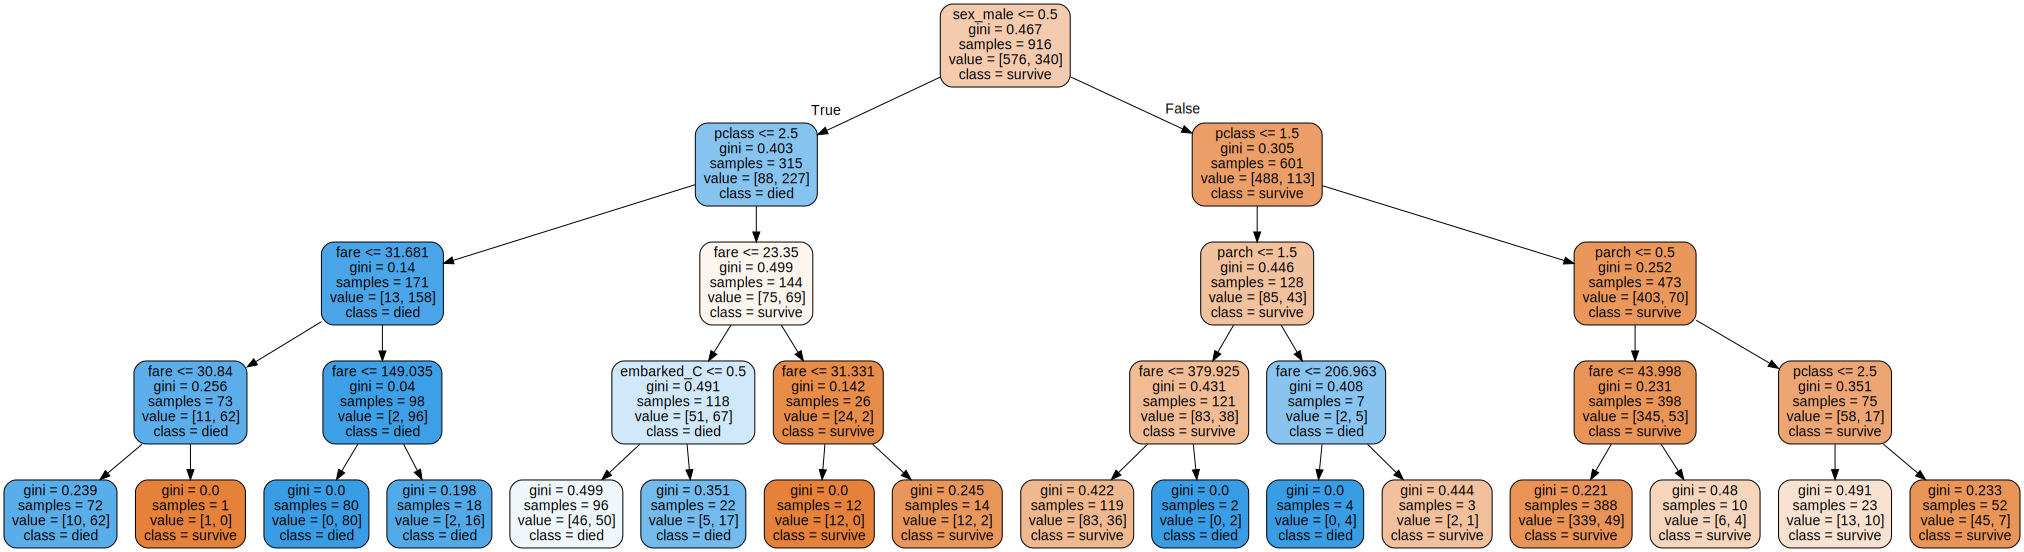

In [53]:
# 의사결정나무 시각화
from sklearn.tree import export_graphviz
import graphviz
import os
# 환경변수 조정
os.environ['PATH']+=os.pathsep+'C:/Anaconda3/Library/bin/graphviz/'

# 모델 저장
export_graphviz(
    tree,
    out_file = 'DecisionTree.dot',
    filled = True,
    rounded = True,
    class_names = ['survive', 'died'],
    feature_names = X.columns

)
with open('DecisionTree.dot') as f:
    dot_graph = f.read()
    

graphviz.Source(dot_graph)

### GridsearchCV를 이용한 하이퍼파라미터 튜닝

In [54]:
# 의사결정나무 - Pipeline 이용해서 최적화 하기
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier()
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None,2,3,4,5,6],
    'max_leaf_nodes' : [None,2,3,4,5,6],
    'min_samples_split' : [2,3,4,5,6],
    'min_samples_leaf' : [1,2,3]
}
grid = GridSearchCV(tree, param_grid = param_grid)

In [56]:
import time
tic = time.time()
grid.fit(X_train,y_train)
toc = time.time()
print(toc - tic)

38.34702277183533


In [57]:
# best_score
grid.best_score_

0.8057080066524115

In [58]:
# best_params
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [60]:
# best_estimator
best_estimator = grid.best_estimator_

In [61]:
# 예측 - train
y_pred = best_estimator.predict(X_train)

In [62]:
# 모델 평가 - confusion matrix
confusion_matrix = pd.crosstab(index = y_train, columns= y_pred, rownames = ['Actual'], colnames = ['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,510,66
1,110,230


In [63]:
# 모델 평가 - classification_report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       576
           1       0.78      0.68      0.72       340

    accuracy                           0.81       916
   macro avg       0.80      0.78      0.79       916
weighted avg       0.81      0.81      0.80       916



In [64]:
# 모델 평가 - accuracty_score
from sklearn.metrics import accuracy_score
round(accuracy_score(y_train,y_pred),3)

0.808

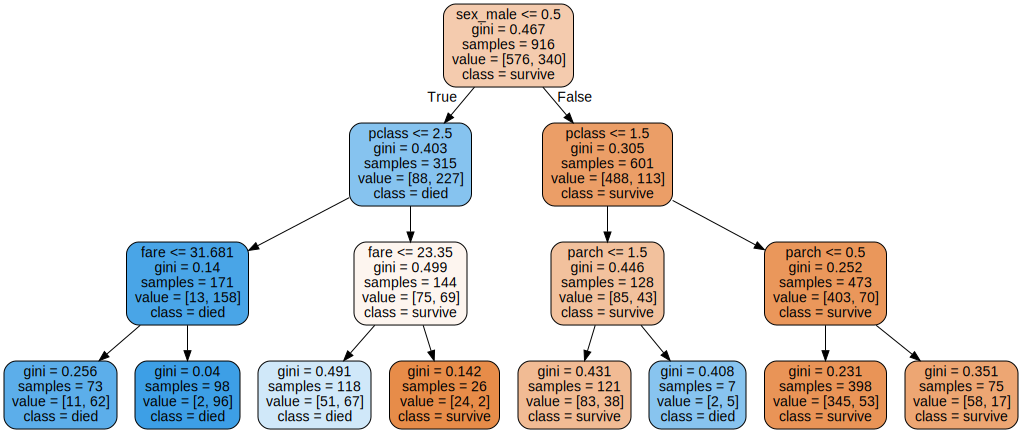

In [65]:
# 의사결정나무 시각화
from sklearn.tree import export_graphviz
import graphviz
import os
# 환경변수 조정
os.environ['PATH']+=os.pathsep+'C:/Anaconda3/Library/bin/graphviz/'

# 모델 저장
export_graphviz(
    best_estimator,
    out_file = 'DecisionTree_best.dot',
    filled = True,
    rounded = True,
    class_names = ['survive', 'died'],
    feature_names = X.columns

)
with open('DecisionTree_best.dot') as f:
    dot_graph = f.read()
    

graphviz.Source(dot_graph)